## BREAST CANCER SEVERITY PREDICTION

### Importing The Libraris

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [5]:
headers = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
           'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df  = pd.read_csv('../dataset/breast-cancer-wisconsin.csv', names = headers)

### Understanding the Data

In [7]:
print("Initial Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())

Initial Data Overview:
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3   

### Data Cleaning

In [9]:
print("\nMissing Values Before Cleaning:")
df = df.replace('?', np.nan)
print(df.isna().sum())


Missing Values Before Cleaning:
Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [10]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Bare Nuclei'] = imputer.fit_transform(df[['Bare Nuclei']])

In [12]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [13]:
df.drop('Sample code number', axis=1, inplace=True)

In [14]:
print("\nMissing Values After Cleaning:")
print(df.isna().sum())
print("\nData Types After Cleaning:")
print(df.dtypes)


Missing Values After Cleaning:
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Data Types After Cleaning:
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


### Data Exploration

### Preparing Data for Modeling

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X)
print('\n')
print(y)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    1         

In [18]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       699.000000               699.000000                699.000000   
mean          4.417740                 3.134478                  3.207439   
std           2.815741                 3.051459                  2.971913   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count         699.000000                   699.000000   699.000000   
mean            2.806867                     3.216023     3.532189   
std             2.855379                     2.214300     3.602774   
m

In [19]:
print("\nClass Distribution:")
print(df['Class'].value_counts())


Class Distribution:
Class
2    458
4    241
Name: count, dtype: int64


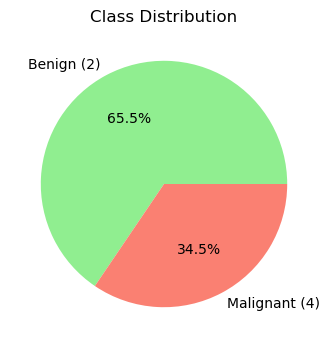

In [20]:
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', 
                                  colors=['lightgreen', 'salmon'],
                                  labels=['Benign (2)', 'Malignant (4)'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

### Split data into training and test sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the logistic regression model on training set

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### Predicting the Test set results

In [26]:
y_pred = classifier.predict(X_test)
print(y_pred)

[2 2 2 4 2 2 2 4 4 2 2 4 2 2 2 4 2 4 4 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2
 4 2 4 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2 2 4 2 4 2
 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 4 4 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 2 2 4 2 2 4 4 2 2 4 4 2 2 4 2 4 2 4 2 2 2]


### Making the Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94  1]
 [ 5 40]]


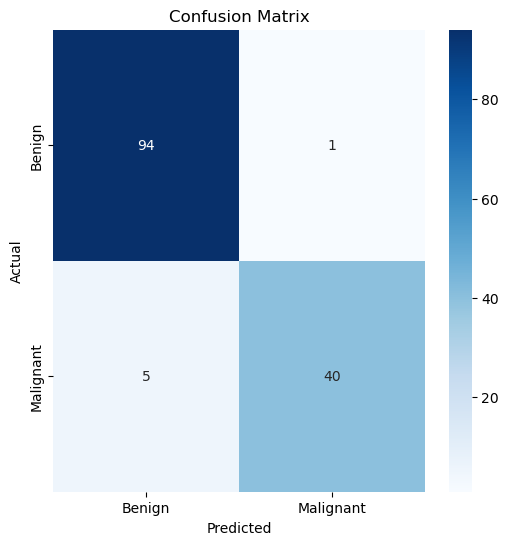

In [29]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Computing the accuracy with K-Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y  = y_train, cv = 10)
print(f'Accuracies : {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation : {accuracies.std()*100:.2f}%')

Accuracies : 96.42%
Standard Deviation : 1.97%


### User Inputed data Breast Cancer Severity Prediction

In [33]:
print("""
=== Breast Cancer Severity Prediction ===
Please enter the following details (1-10 scale):
""")

features = [
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses'
]

user_input = []
for feature in features:
    while True:
        try:
            value = int(input(f"{feature} (1-10): "))
            if 1 <= value <= 10:
                user_input.append(value)
                break
            else:
                print("Please enter a value between 1 and 10")
        except ValueError:
            print("Please enter a valid integer")

user_data = np.array(user_input).reshape(1, -1)
user_df = pd.DataFrame(user_data, columns=features)
prediction = classifier.predict(user_df)
probability = classifier.predict_proba(user_df)

print("\n=== Prediction Results ===")
if prediction[0] == 2:
    print("Prediction: Benign (Class 2)")
else:
    print("Prediction: Malignant (Class 4)")
    
print(f"Confidence: {np.max(probability)*100:.2f}%")
print("\nNote: This is a machine learning prediction, not a medical diagnosis.")
print("Please consult a healthcare professional for medical advice.")


=== Breast Cancer Severity Prediction ===
Please enter the following details (1-10 scale):



Clump Thickness (1-10):  5
Uniformity of Cell Size (1-10):  1
Uniformity of Cell Shape (1-10):  1
Marginal Adhesion (1-10):  1
Single Epithelial Cell Size (1-10):  2
Bare Nuclei (1-10):  1
Bland Chromatin (1-10):  3
Normal Nucleoli (1-10):  1
Mitoses (1-10):  1



=== Prediction Results ===
Prediction: Benign (Class 2)
Confidence: 98.27%

Note: This is a machine learning prediction, not a medical diagnosis.
Please consult a healthcare professional for medical advice.
